##Ladder Option

Ladder Option(래더 옵션)은 옵션의 기초 자산 가격이 미리 정해진 가격 수준(계단식 수준)에 도달할 때마다 이익을 잠그는 구조를 갖고 있습니다. 즉, 기초 자산이 새로운 "계단"에 도달할 때마다 그 수준에서 고정된 이익이 확보됩니다. 래더 옵션은 전통적인 옵션보다 리스크는 적지만, 잠재적 이익도 제한적입니다.

Ladder Option Price: 5.19


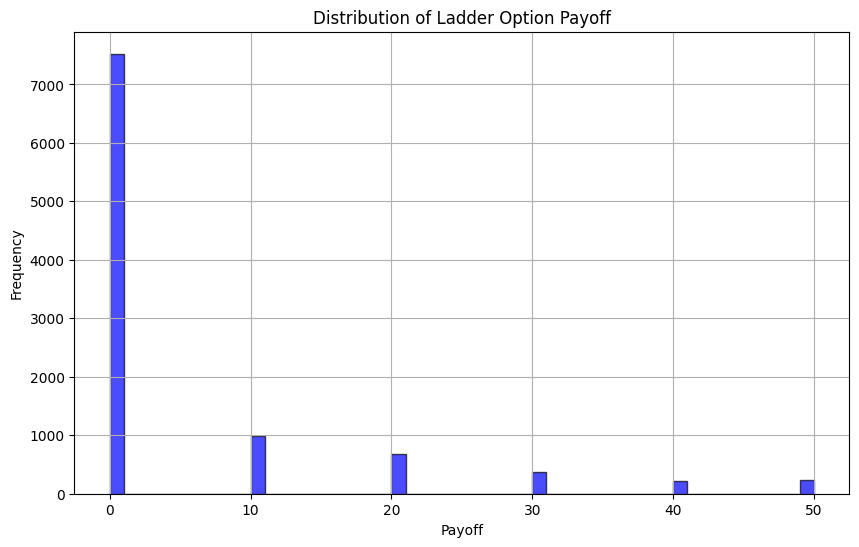

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def simulate_stock_paths(S0, r, sigma, T, M, I):
    """
    주식 가격 경로 시뮬레이션 함수

    Parameters:
    S0: 초기 주식 가격
    r: 무위험 이자율
    sigma: 변동성
    T: 만기 시간 (단위: 년)
    M: 기간 수 (단위: 일)
    I: 시뮬레이션 수

    Returns:
    주식 가격 경로 배열 (I x M)
    """
    dt = T / M
    paths = np.zeros((I, M + 1))
    paths[:, 0] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        paths[:, t] = paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)
    return paths

def ladder_option_payoff(paths, strike, ladder_levels):
    """
    래더 옵션의 페이오프 계산 함수

    Parameters:
    paths: 주식 가격 경로 배열 (I x M)
    strike: 행사가격
    ladder_levels: 계단식 수준 배열

    Returns:
    래더 옵션의 페이오프 배열
    """
    max_prices = np.max(paths, axis=1)
    payoffs = np.zeros_like(max_prices)
    for level in ladder_levels:
        payoffs = np.maximum(payoffs, np.where(max_prices >= level, level - strike, 0))
    return payoffs

# 래더 옵션 파라미터 설정
S0 = closing_prices[0]  # 초기 주식 가격
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
T = 1  # 만기 시간 (1년)
M = 252  # 기간 수 (일 단위)
I = 10000  # 시뮬레이션 수
strike = 150  # 행사가격
ladder_levels = [160, 170, 180, 190, 200]  # 계단식 수준

# 주식 가격 경로 시뮬레이션
paths = simulate_stock_paths(S0, r, sigma, T, M, I)

# 래더 옵션 페이오프 계산
ladder_payoffs = ladder_option_payoff(paths, strike, ladder_levels)

# 래더 옵션 가격 계산 (할인된 페이오프 평균)
ladder_price = np.exp(-r * T) * np.mean(ladder_payoffs)
print(f"Ladder Option Price: {ladder_price:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(ladder_payoffs, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Ladder Option Payoff')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
